In [1]:
import pandas as pd
import numpy as np
import warnings
# Suppressing warnings
warnings.filterwarnings('ignore')

# Generating sample data
np.random.seed(0)

# Date ranges
dates = pd.date_range(start='2022-01-01', end='2022-12-31', periods=1000)

# Regions, States, and Cities
regions = np.random.choice(['North', 'South', 'East', 'West'], size=1000)
states = np.random.choice(['StateA', 'StateB', 'StateC', 'StateD'], size=1000)
cities = np.random.choice(['CityX', 'CityY', 'CityZ'], size=1000)

# Products and Categories
products = np.random.choice(['ProductA', 'ProductB', 'ProductC'], size=1000)
categories = np.random.choice(['Category1', 'Category2', 'Category3'], size=1000)

# Segment, Ship Mode, Shipping Type
segments = np.random.choice(['Consumer', 'Corporate', 'Home Office'], size=1000)
ship_modes = np.random.choice(['Standard Class', 'Second Class', 'First Class'], size=1000)
shipping_types = np.random.choice(['Express', 'Regular', 'Overnight'], size=1000)

# Numeric columns
quantity = np.random.randint(1, 10, size=1000)
profit = np.random.uniform(-100, 100, size=1000).round(2)
sales = np.random.uniform(100, 1000, size=1000).round(2)
discount = np.random.uniform(0, 0.5, size=1000).round(2)
shipping_cost = np.random.uniform(5, 50, size=1000).round(2)
customer_income = np.random.randint(20000, 150000, size=1000)
customer_id = np.random.randint(1000, 5000, size=1000)

# Creating the DataFrame
data = {
    'order_date': dates,
    'ship_date': dates + pd.to_timedelta(np.random.randint(1, 10, size=1000), unit='D'),
    'quantity': quantity,
    'profit': profit,
    'sales': sales,
    'region': regions,
    'state': states,
    'city': cities,
    'product': products,
    'product_category': categories,
    'segment': segments,
    'discount': discount,
    'ship_mode': ship_modes,
    'shipping_cost': shipping_cost,
    'shipping_type': shipping_types,
    'customer_income': customer_income,
    'customer_id': customer_id
}

df = pd.DataFrame(data)

# Displaying the first few rows of the generated dataset
df.head()


,order_date,ship_date,quantity,profit,sales,region,state,city,product,product_category,segment,discount,ship_mode,shipping_cost,shipping_type,customer_income,customer_id
0,2022-01-01 00:00:00.000000000,2022-01-07 00:00:00.000000000,4,6.79,914.96,North,StateD,CityY,ProductC,Category1,Home Office,0.01,Second Class,24.82,Overnight,135906,1805
1,2022-01-01 08:44:41.081081081,2022-01-08 08:44:41.081081081,7,74.15,714.20,West,StateC,CityY,ProductB,Category3,Consumer,0.42,Second Class,21.95,Overnight,90414,3057
2,2022-01-01 17:29:22.162162162,2022-01-06 17:29:22.162162162,2,-56.39,955.07,South,StateD,CityZ,ProductB,Category2,Corporate,0.08,First Class,39.62,Express,43269,1289
3,2022-01-02 02:14:03.243243243,2022-01-08 02:14:03.243243243,7,93.39,502.86,North,StateA,CityX,ProductB,Category1,Home Office,0.28,First Class,24.77,Regular,119636,1604
4,2022-01-02 10:58:44.324324324,2022-01-10 10:58:44.324324324,2,-84.06,692.63,West,StateA,CityZ,ProductB,Category3,Corporate,0.47,Standard Class,16.20,Regular,87008,3529


## 13: Scatter Plot Matrix  (Bivariate analysis)

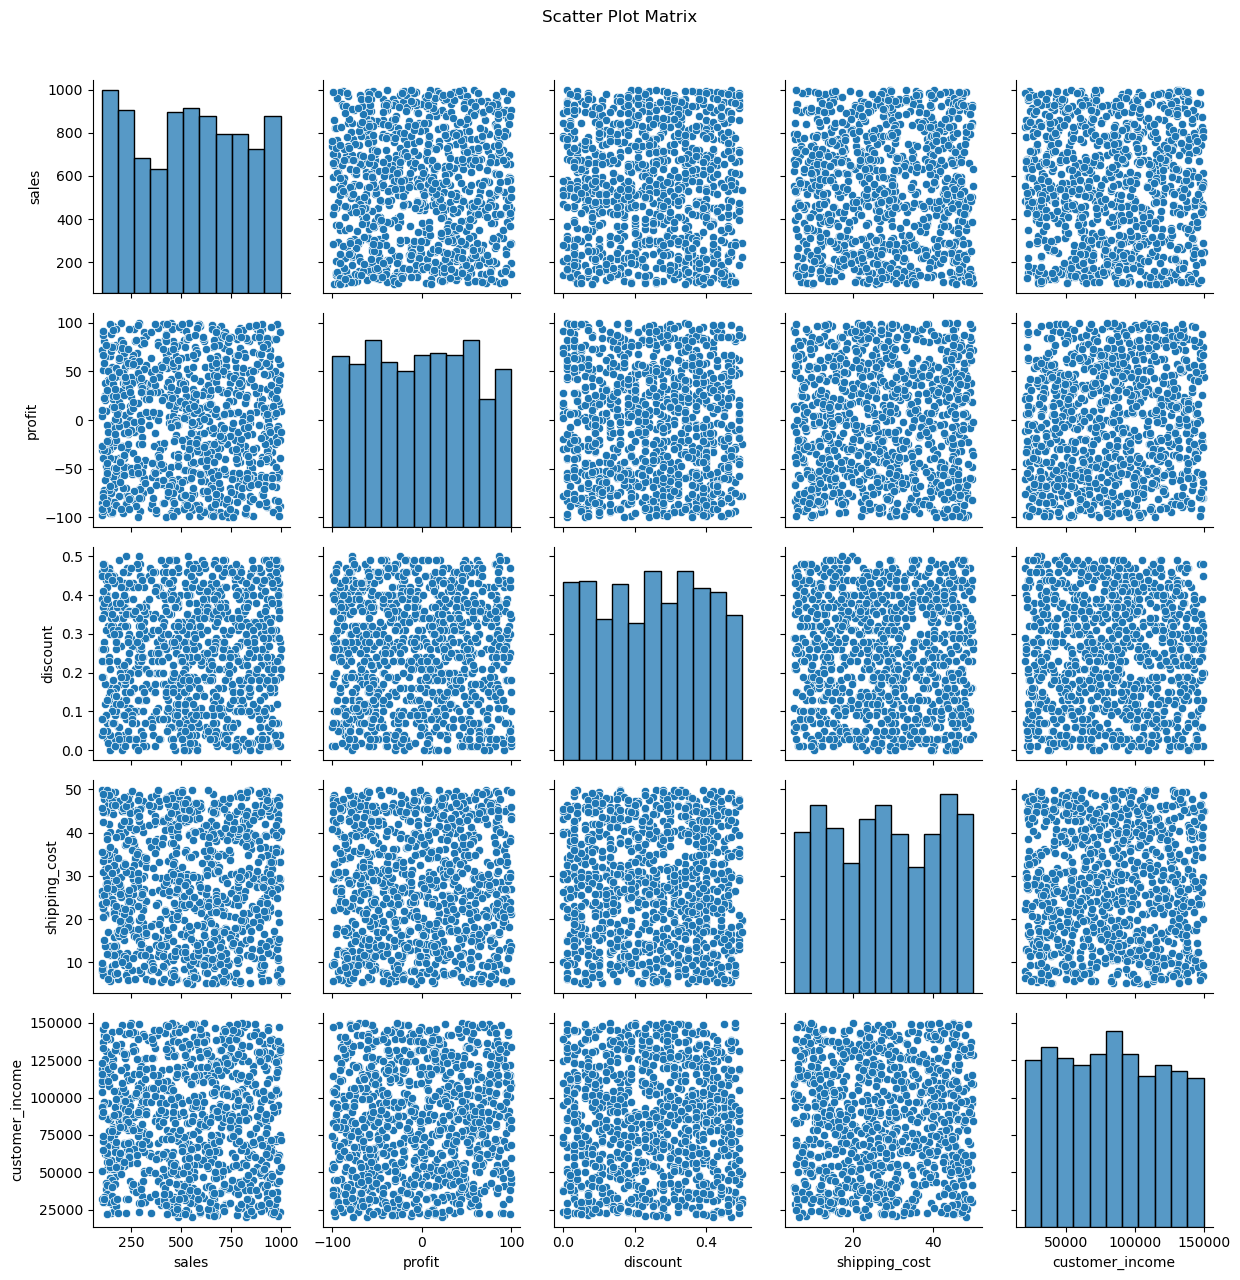

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting numeric columns for scatter plot matrix
numeric_cols = ['sales', 'profit', 'discount', 'shipping_cost', 'customer_income']

# Creating scatter plot matrix
sns.pairplot(df[numeric_cols], height=2.5)
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.tight_layout()
plt.show()

## 14: Jointplot of Sales vs. Profit with Regression Line

<Figure size 800x600 with 0 Axes>

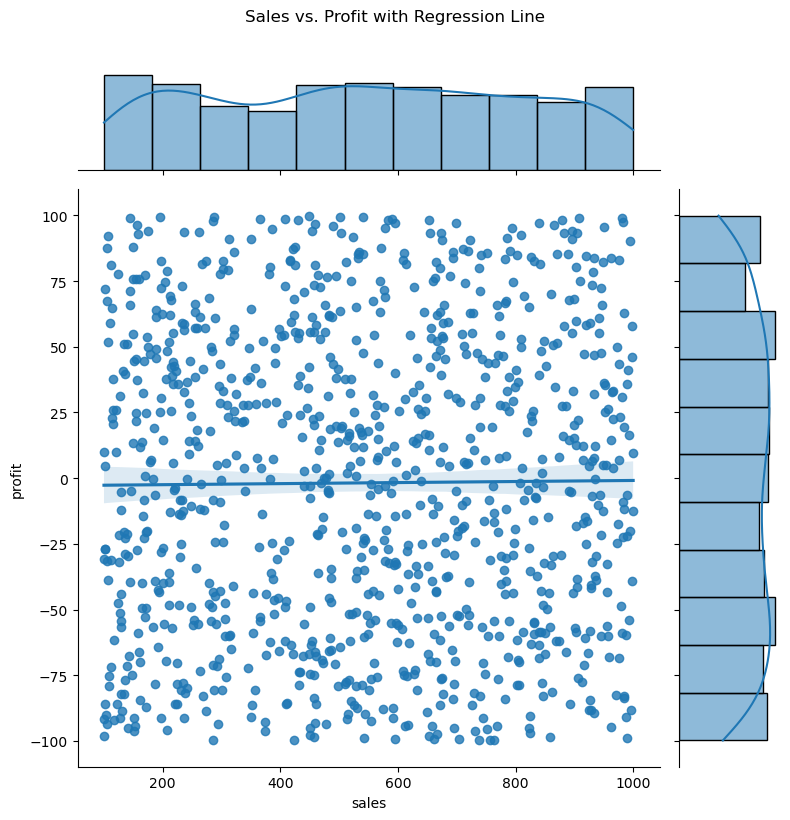

In [4]:
# Jointplot of sales vs. profit with regression line
plt.figure(figsize=(8, 6))
sns.jointplot(x='sales', y='profit', data=df, kind='reg', height=8)
plt.suptitle('Sales vs. Profit with Regression Line', y=1.02)
plt.tight_layout()
plt.show()

## 15: Pairwise Correlation Heatmap

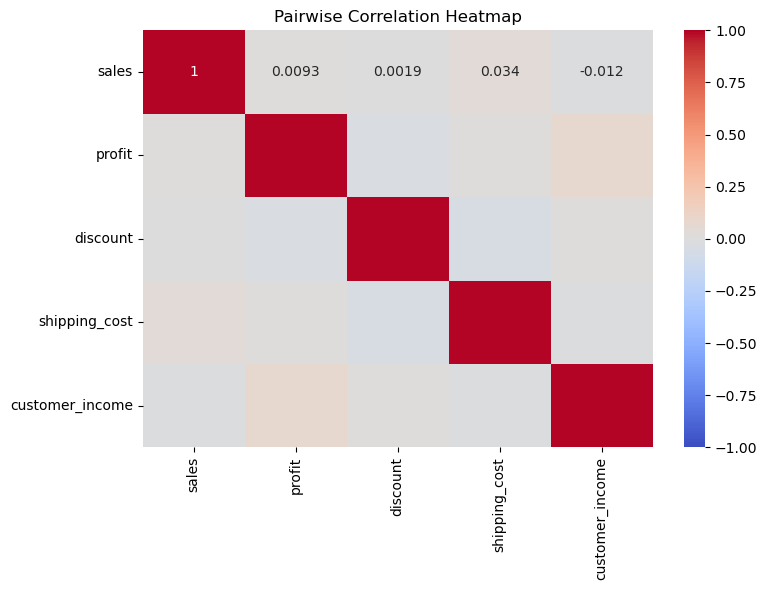

In [5]:
# Calculating pairwise correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plotting heatmap of pairwise correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pairwise Correlation Heatmap')
plt.tight_layout()
plt.show()

## 16: Pairplot with Hue by Segment (multi variate)

<Figure size 1000x800 with 0 Axes>

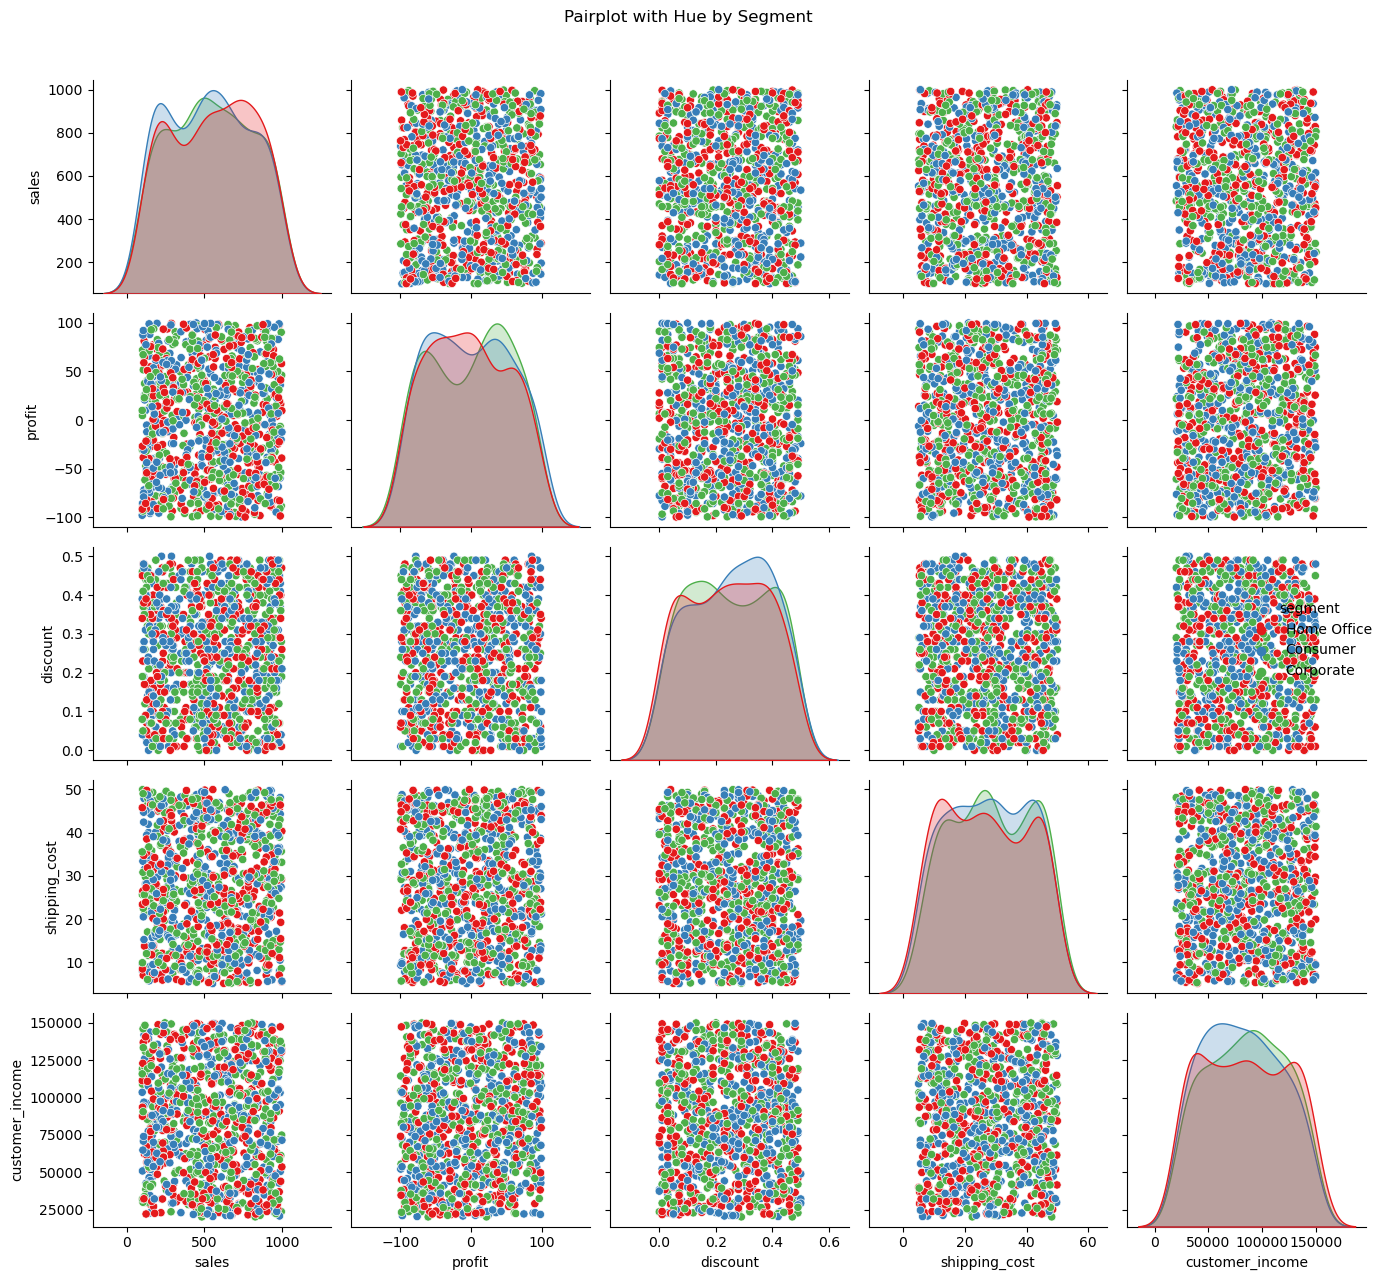

In [6]:
# Creating pairplot with hue by segment
plt.figure(figsize=(10, 8))
sns.pairplot(df, vars=['sales', 'profit', 'discount', 'shipping_cost', 'customer_income'], hue='segment', palette='Set1', height=2.5)
plt.suptitle('Pairplot with Hue by Segment', y=1.02)
plt.tight_layout()
plt.show()

## 17: Boxen Plot of Sales by Region and Segment

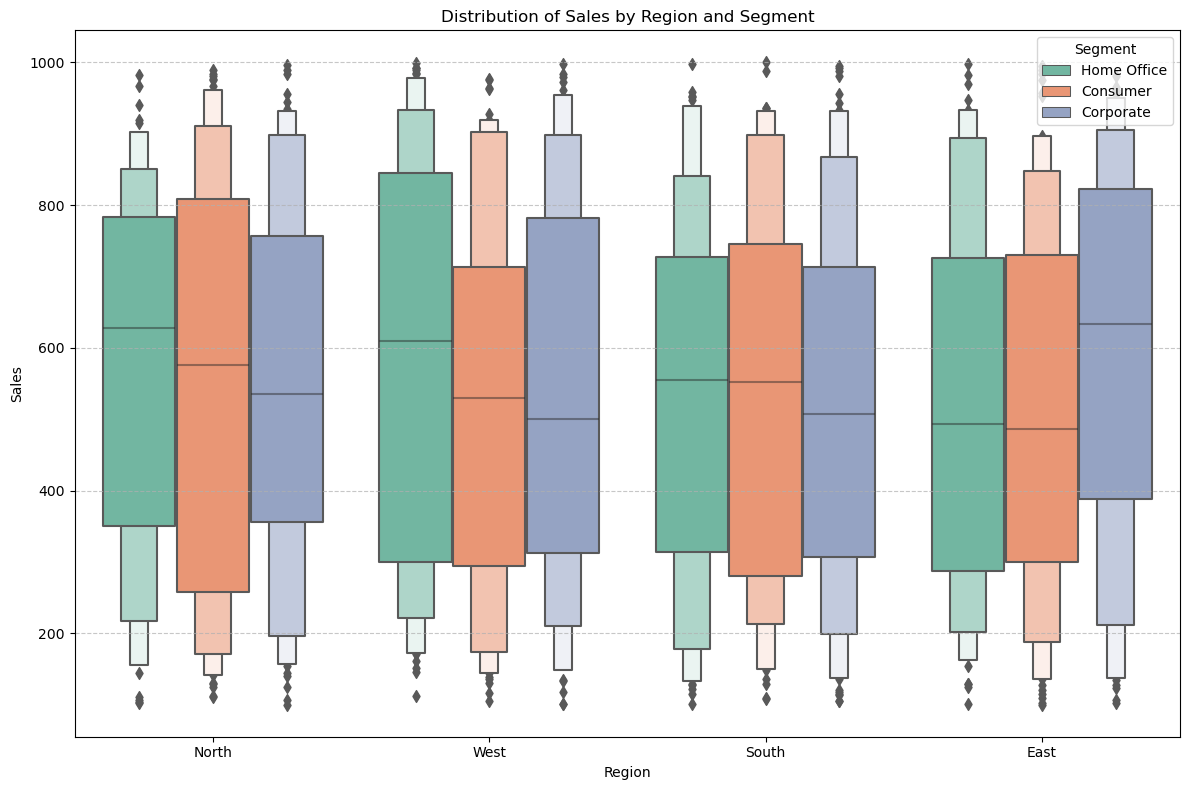

In [7]:
# Plotting boxen plot of sales by region and segment
plt.figure(figsize=(12, 8))
sns.boxenplot(x='region', y='sales', hue='segment', data=df, palette='Set2')
plt.title('Distribution of Sales by Region and Segment')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Segment', loc='upper right')
plt.tight_layout()
plt.show()

## 18: Violin Plot of Profit by Product Category and Ship Mode

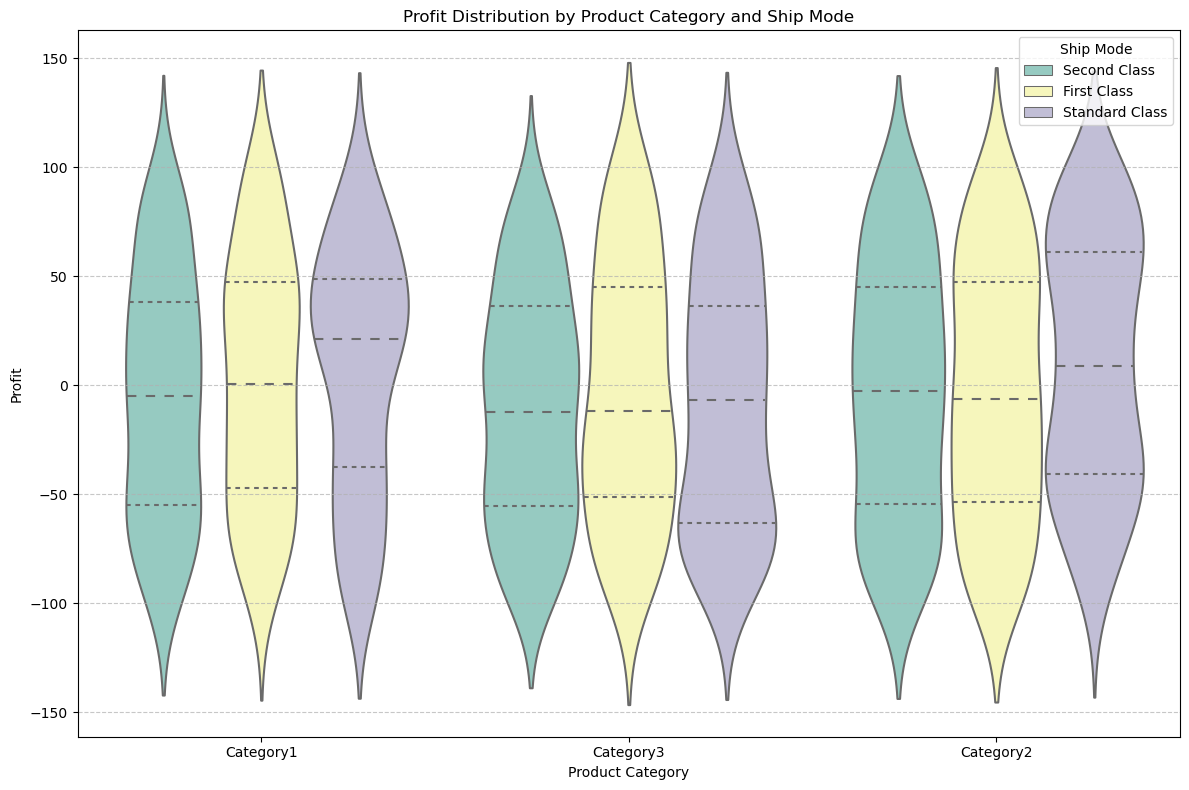

In [8]:
# Plotting grouped violin plot of profit by product category and ship mode
plt.figure(figsize=(12, 8))
sns.violinplot(x='product_category', y='profit', hue='ship_mode', data=df, palette='Set3', inner='quartile')
plt.title('Profit Distribution by Product Category and Ship Mode')
plt.xlabel('Product Category')
plt.ylabel('Profit')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Ship Mode', loc='upper right')
plt.tight_layout()
plt.show()


In [11]:
df["ship_mode"].unique()

array(['Second Class', 'First Class', 'Standard Class'], dtype=object)

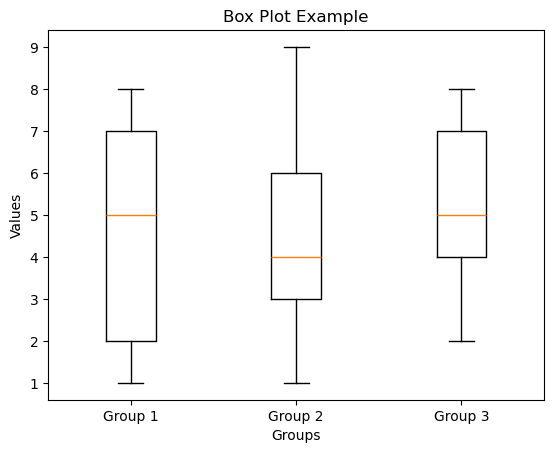

In [12]:
# Box Plot:

import matplotlib.pyplot as plt

# Sample data (multiple datasets)
data1 = [2, 5, 7, 1, 8]
data2 = [4, 1, 9, 3, 6]
data3 = [7, 2, 4, 8, 5]

# Create the box plot with labels
plt.boxplot([data1, data2, data3], labels=['Group 1', 'Group 2', 'Group 3'])

# Add labels and title
plt.xlabel("Groups")
plt.ylabel("Values")
plt.title("Box Plot Example")

# Display the plot
plt.show()

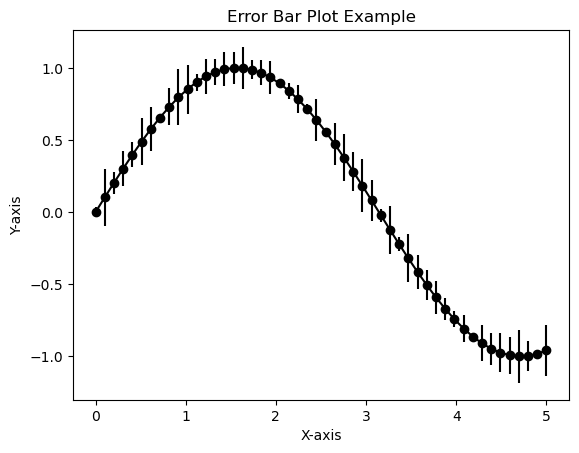

In [15]:
# Error Bar Plot:

import matplotlib.pyplot as plt
import numpy as np

# Sample data with errors
x = np.linspace(0, 5, 50)
y = np.sin(x)
yerr = 0.2 * np.random.rand(len(x))  # Simulate random errors

# Create the error bar plot
plt.errorbar(x, y, yerr=yerr, fmt='o-', color='black')  # 'o-' specifies markers and line style

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Error Bar Plot Example")

# Display the plot
plt.show()

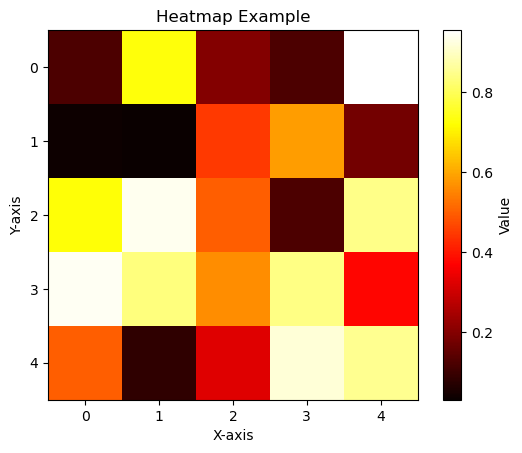

In [16]:
# Heatmap:

import matplotlib.pyplot as plt
import numpy as np

# Sample data as a matrix
data = np.random.rand(5, 5)

# Create the heatmap
plt.imshow(data, cmap='hot')  # 'hot' is a colormap

# Add labels and title
plt.colorbar(label='Value')  # Colorbar for legend
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Heatmap Example")

# Display the plot
plt.show()

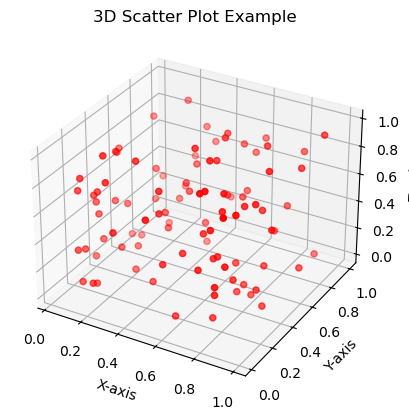

In [17]:
# 3D Scatter Plot:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Sample 3D data
x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatter plot with red spheres
ax.scatter(x, y, z, c='red', marker='o')

# Add labels and title
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.title("3D Scatter Plot Example")

# Display the plot
plt.show()

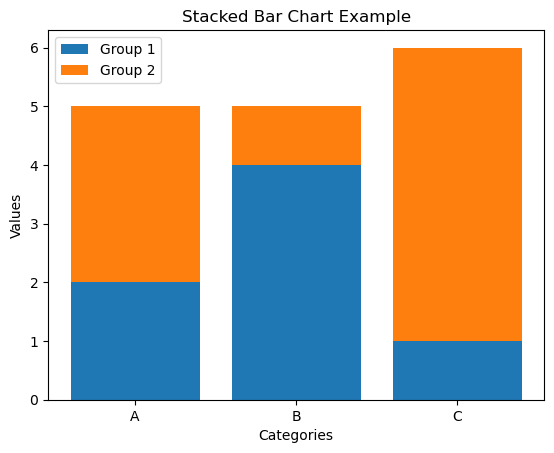

In [18]:
# Stacked Bar Chart:

import matplotlib.pyplot as plt

# Categories and their values for multiple groups
categories = ['A', 'B', 'C']
values1 = [2, 4, 1]
values2 = [3, 1, 5]

# Create the stacked bar chart
plt.bar(categories, values1, label='Group 1')
plt.bar(categories, values2, bottom=values1, label='Group 2')

# Add labels, title, and legend
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Stacked Bar Chart Example")
plt.legend()

# Display the plot
plt.show()

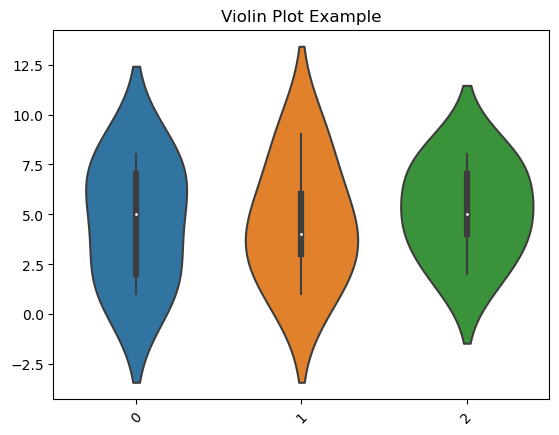

In [19]:
# Violin Plot:

import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for violin plots

# Sample data (multiple datasets)
data1 = [2, 5, 7, 1, 8]
data2 = [4, 1, 9, 3, 6]
data3 = [7, 2, 4, 8, 5]

# Create the violin plot with labels
sns.violinplot(data=[data1, data2, data3], labels=['Group 1', 'Group 2', 'Group 3'])

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)  # Rotate x-axis labels

# Add title
plt.title("Violin Plot Example")

# Display the plot
plt.show()

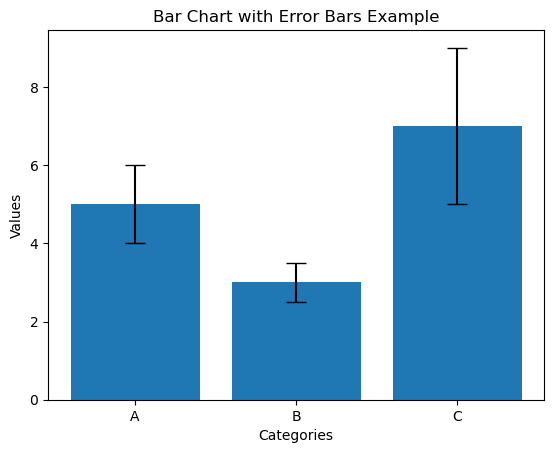

In [20]:
# Bar Chart with Error Bars:

import matplotlib.pyplot as plt
import numpy as np

# Category labels and their values with errors
categories = ['A', 'B', 'C']
values = [5, 3, 7]
errors = [1, 0.5, 2]

# Create the bar chart with error bars
plt.bar(categories, values, yerr=errors, capsize=7)  # 'capsize' controls error bar size

# Add labels and title
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Bar Chart with Error Bars Example")

# Display the plot
plt.show()

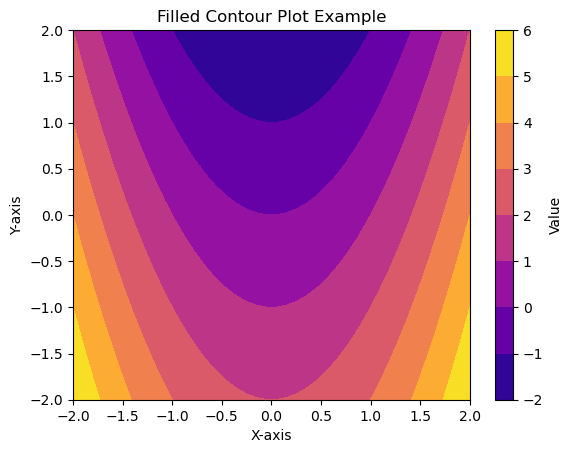

In [21]:
# Filled Contour Plot:

import matplotlib.pyplot as plt
import numpy as np

# Sample function (2D parabola)
def func(x, y):
  return x**2 - y

# Generate data grid
x = np.linspace(-2, 2, 40)
y = np.linspace(-2, 2, 40)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

# Create the filled contour plot with colormap
plt.contourf(X, Y, Z, cmap='plasma')  # 'plasma' is a colormap

# Add labels and title
plt.colorbar(label='Value')  # Colorbar for legend
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Filled Contour Plot Example")

# Display the plot
plt.show()

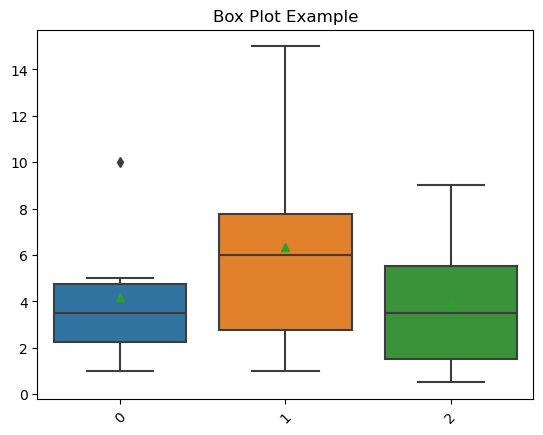

In [22]:
# Boxen Plot:

import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for box plots
import numpy as np

# Sample data with outliers
data = [
    [1, 2,3, 4, 5, 10],  # No outliers
    [2, 5, 7, 1, 8, 15],  # Outlier above upper whisker
    [4, 1, 9, 3, 6, 0.5]   # Outlier below lower whisker
]

# Convert data to a pandas DataFrame for seaborn
import pandas as pd
df = pd.DataFrame(data).T

# Create the box plot with labels
sns.boxplot(data=df, showmeans=True)  # 'howmeans=True' adds means as points

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)  # Rotate x-axis labels

# Add title
plt.title("Box Plot Example")

# Display the plot
plt.show()

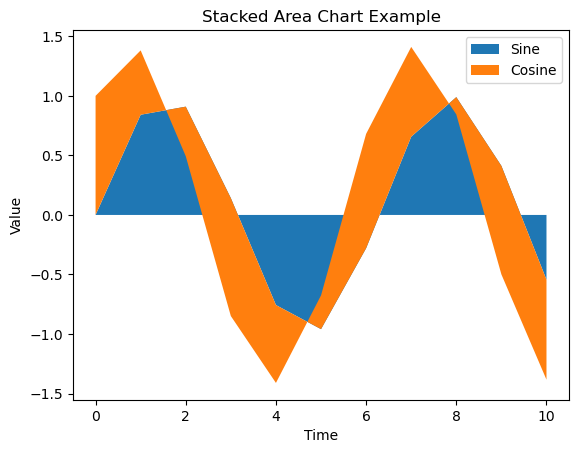

In [24]:
# Stacked Area Chart:

import matplotlib.pyplot as plt

# Sample data (time series)
x = np.linspace(0, 10, 11)  # Time points
y1 = np.sin(x)
y2 = np.cos(x)
y3 = x**2

# Create the stacked area chart
plt.stackplot(x, [y1, y2], labels=['Sine', 'Cosine'])

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Stacked Area Chart Example")
plt.legend()  # Add legend

# Display the plot
plt.show()

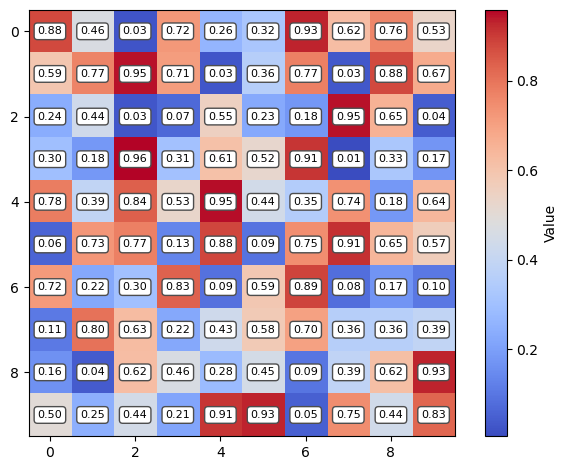

In [25]:
# Customizable Heatmaps:

import matplotlib.pyplot as plt
import numpy as np

# Sample data as a matrix
data = np.random.rand(10, 10)

# Create the heatmap with annotations
plt.imshow(data, cmap='coolwarm')  # 'coolwarm' is a colormap

# Add annotations (example)
for i in range(len(data)):
  for j in range(len(data[0])):
    text = f"{data[i, j]:.2f}"  # Format text with 2 decimal places
    plt.text(j, i, text, ha='center', va='center', fontsize=8, bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

# Add colorbar and adjust layout
plt.colorbar(label='Value')  # Colorbar for legend
plt.tight_layout()  # Adjust spacing to avoid clipping annotations

# Display the plot
plt.show()

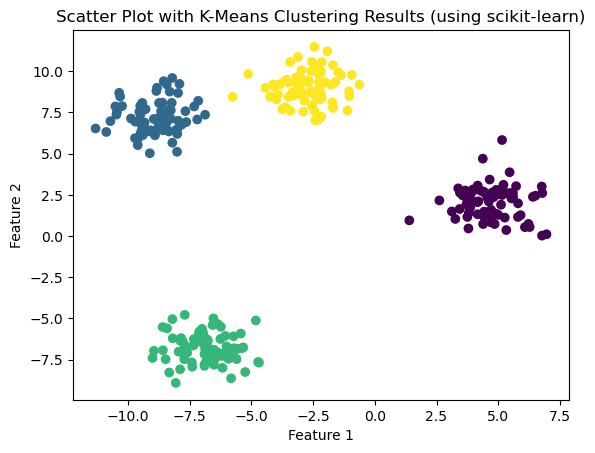

In [26]:
# Scikit-learn Integration:

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Sample data (2D blobs)
X, y_true = make_blobs(n_samples=300, centers=4, random_state=42)

# Perform K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# Create a scatter plot with cluster colors
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')  # Color by cluster assignment

# Add labels and title
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot with K-Means Clustering Results (using scikit-learn)")

# Display the plot
plt.show()